<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>--</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [2]:
data=pd.read_csv('Churn_Modelling.csv')
#смотрим таблицу
display(data.head(10))
print(data.info())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


<i><b>Перед нами датасет, из 10 000 строк. В столбце Tenure есть пропуски, которые надо будет обработать. Также названия столбцов лучше сменить на строчные. <br>Exited будет целевым признаком машинного обучения.</b></i>

<div class="alert alert-block alert-success">
<b>Успех:</b> Загрузка и данных проведены, идем дальше
</div>

<i>Преборазуем колонки к строчным буквам </i>

In [3]:
data.columns=data.columns.str.lower()
display(data.head(10))

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
#Посмотрим число строк полных дубликатов
print(data.duplicated().sum()) 

0


<i>Полных дубликатов нет </i>

In [5]:
display(data.describe())

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

В колонке с целевым признакам только значения 0 и 1, нерелевантных значений нет.

<i>Обработаем пропуска в tenure</i>

In [7]:
data.isnull().mean()
data.loc[data['tenure'].isnull()]

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited


<i>Видим, что в местах пропусков у клиентов есть какое-то число продуктов, значит на 0 NaN заменить нельзя.<br>Какой-то логики у пропусков не видно, вроде пропусков в определенной стране.</i>

In [8]:
data.loc[data['tenure'].isnull()].describe()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<i>Возможно заменить пропуски средним по возрасту?<br>Посмотрим на график зависимости возраста и  Tenure</i>

<i>Посмотрим гистограмму распределенеия значений tenure </i>

<AxesSubplot:>

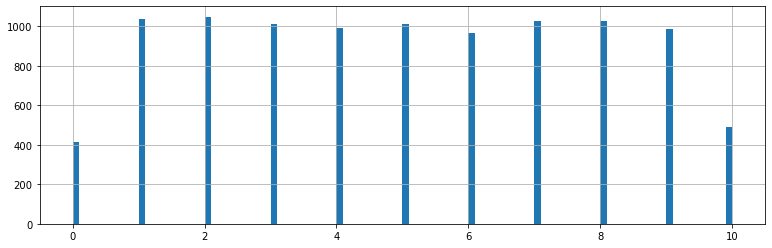

In [9]:
data['tenure'].hist(bins = 100,figsize=(13,4))

<i>Распределение похоже на нормальное </i>

<i>Посмотрим на зависимость чилса лет клиента в банке от его/ее возраста</i>

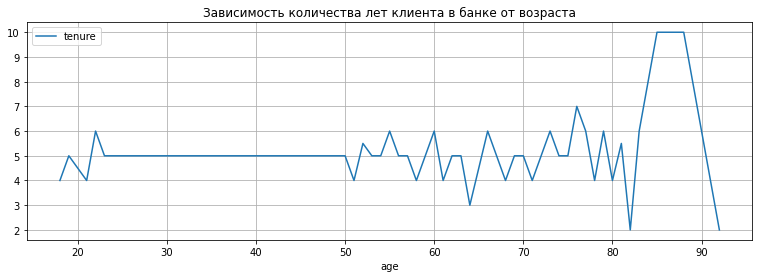

In [10]:
data_graph_tenure_Age=data.loc[data['tenure'].isnull()==False].pivot_table(index='age', values='tenure', aggfunc='median')
data_graph_tenure_Age.plot(grid = True,figsize=(13,4))
plt.title('Зависимость количества лет клиента в банке от возраста')
plt.show()

<i>Видим, что: <br>
а)На участке от 0 до 23 лет большой разброс, на участке от 50 и выше чем дальше тем больше разброс. Скорей всего у нас меньше данных по этим возрастам. Это неудивительно, так как люди старшего возраста меньше пользуются банками, и младшего тоже начиная с определенного порога.<br>
б)Медиана самых активных клиентов не меняется, поэтому не будетм дробить по возрастным категориям и просто заменим пропуски медианой.
</i>

In [11]:
print(data.loc[data['age']<23].info())
print(data.loc[data['age']>50].info())
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 57 to 9940
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        226 non-null    int64  
 1   customerid       226 non-null    int64  
 2   surname          226 non-null    object 
 3   creditscore      226 non-null    int64  
 4   geography        226 non-null    object 
 5   gender           226 non-null    object 
 6   age              226 non-null    int64  
 7   tenure           226 non-null    int64  
 8   balance          226 non-null    float64
 9   numofproducts    226 non-null    int64  
 10  hascrcard        226 non-null    int64  
 11  isactivemember   226 non-null    int64  
 12  estimatedsalary  226 non-null    float64
 13  exited           226 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 26.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1261 entries, 16 to 9991
Data columns (

<i>Так и есть, людей возрастом 'меньше 23' 226, возрастом 'старше 50' 1261, при размере датасета в 10 000 строк </i>

In [12]:
#Посмотрим медиану
tenure_median = data.loc[data['tenure'].isnull()==False,'tenure'].median()
print('Медианное число лет, сколько человек является клиентом банка:',tenure_median)

Медианное число лет, сколько человек является клиентом банка: 5.0


In [13]:
#заменим пропуски медианой
data['tenure'].fillna(tenure_median, inplace=True)
#проверим результат
data.isnull().mean()

rownumber          0.0
customerid         0.0
surname            0.0
creditscore        0.0
geography          0.0
gender             0.0
age                0.0
tenure             0.0
balance            0.0
numofproducts      0.0
hascrcard          0.0
isactivemember     0.0
estimatedsalary    0.0
exited             0.0
dtype: float64

## Исследование задачи

<i>У нас стоит задача классификации, а в столбце Gender и возомжно другх, категориальные признаки,а не численные с которыми может работать модель</i>

In [14]:
#Применим прямое кодирование ко всему датафрейму. Удалим колонку surname, так как она неинформативна.
data_ohe = pd.get_dummies(data.drop('surname', axis=1), drop_first=True)

In [15]:
#Разбиваем данные на выборки, тестовую и валидационную.
train_valid, test = train_test_split(data_ohe, test_size=0.2,random_state=12345)
train, valid = train_test_split(train_valid, test_size=0.2,random_state=12345)

features_train = train.drop(['exited','customerid','rownumber'], axis=1)
target_train = train['exited']
features_valid = valid.drop(['exited','customerid','rownumber'], axis=1)
target_valid = valid['exited']
features_test = test.drop(['exited','customerid','rownumber'], axis=1)
target_test = test['exited']
#Проверим размеры выборок
print(data.shape)
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)
print(features_test.shape)
print(target_test.shape)


(10000, 14)
(6400, 11)
(6400,)
(1600, 11)
(1600,)
(2000, 11)
(2000,)


<i>Выборки подготовлены</i>

<i>Исследуем баланс классов</i>

In [16]:
#Обучим модель логиситической регрессии
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roclg_regr=roc_auc_score(target_valid, probabilities_one_valid)
f1_score_lg_regr=f1_score(target_valid, predicted_valid)
recall_lg_regr=recall_score(target_valid, predicted_valid)
precision_lg_regr=precision_score(target_valid, predicted_valid)
print('F1 score:',f1_score_lg_regr)
print('Полнота',recall_lg_regr)
print('Точность',precision_lg_regr)
print('AUC-ROC:',auc_roclg_regr)
#result_ta

F1 score: 0.08069164265129683
Полнота 0.0462046204620462
Точность 0.3181818181818182
AUC-ROC: 0.6749976462565299


In [17]:
probabilities_one_valid

array([0.28469304, 0.3327349 , 0.10053269, ..., 0.18163633, 0.18861566,
       0.31603581])

In [18]:
print(data.loc[data['exited']==1].shape)
print(data.loc[data['exited']==0].shape)

(2037, 14)
(7963, 14)


<i>По малому значению F1 и другим параметрам, видим что классы несбалансированы.</i>

In [19]:
#Обучим модель DecisionTreeClassifier для сравнения с логистической регрессией
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc_dcs_tr_cls=roc_auc_score(target_valid, probabilities_one_valid)
f1_score_dcs_tr_cls=f1_score(target_valid, predicted_valid)
recall_dcs_tr_cls=recall_score(target_valid, predicted_valid)
precision_dcs_tr_cls=precision_score(target_valid, predicted_valid)
print('F1 score:',f1_score_dcs_tr_cls)
print('Полнота',recall_dcs_tr_cls)
print('Точность',precision_dcs_tr_cls)
print('AUC-ROC:',auc_roc_dcs_tr_cls)

F1 score: 0.4603174603174603
Полнота 0.47854785478547857
Точность 0.4434250764525994
AUC-ROC: 0.669112015287882


In [20]:
#Попробуем случайный лес
model = RandomForestClassifier(random_state=12345, n_estimators=80)
model.fit(features_train,target_train)
predicted_valid  = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc_rnd_frs_cls=roc_auc_score(target_valid, probabilities_one_valid)
f1_score_rnd_frs_cls=f1_score(target_valid, predicted_valid)
recall_rnd_frs_cls=recall_score(target_valid, predicted_valid)
precision_rnd_frs_cls=precision_score(target_valid, predicted_valid)

print('F1 score:',f1_score_rnd_frs_cls)
print('Полнота',recall_rnd_frs_cls)
print('Точность',precision_rnd_frs_cls)
print('AUC-ROC:',auc_roc_rnd_frs_cls)

F1 score: 0.5737373737373738
Полнота 0.46864686468646866
Точность 0.7395833333333334
AUC-ROC: 0.855215513841284


In [21]:
df = pd.DataFrame([[f1_score_lg_regr, recall_lg_regr,precision_lg_regr,auc_roclg_regr], [f1_score_dcs_tr_cls,recall_dcs_tr_cls,precision_dcs_tr_cls, auc_roc_dcs_tr_cls],[f1_score_rnd_frs_cls,recall_rnd_frs_cls,precision_rnd_frs_cls,auc_roc_rnd_frs_cls]], columns=['F1-score','Recall','Precision','AUC-ROC' ], index=['Lgst_regr', 'DecTrCllsfr','Rndm_Frst_Classifier'])
df


,F1-score,Recall,Precision,AUC-ROC
Lgst_regr,0.080692,0.046205,0.318182,0.674998
DecTrCllsfr,0.460317,0.478548,0.443425,0.669112
Rndm_Frst_Classifier,0.573737,0.468647,0.739583,0.855216


<i>1.Баланс класса сильно смещен в сторону ответов "0". <br>2.Логистическая регрессия очень чувствительная к сбалансированности классов и другим настройкам, в отличие от дерева решений и случайного дерева. </i>

## Борьба с дисбалансом

<i>Обучим логистическую регрессию учитывая дисбаланс классов</i>


In [22]:
%%time
model = LogisticRegression(random_state=12345, solver='liblinear',class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1 score:',f1_score(target_valid, predicted_valid))
print('Полнота',recall_score(target_valid, predicted_valid))
print('Точность',precision_score(target_valid, predicted_valid))
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:',auc_roc)

F1 score: 0.45819761129207376
Полнота 0.6963696369636964
Точность 0.3414239482200647
AUC-ROC: 0.7606128384619494
Wall time: 37.9 ms


<i>Параметры сильно улучшились.Попробуем другие модели </i>

In [23]:
%%time
model = DecisionTreeClassifier(random_state=12345,class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1 score:',f1_score(target_valid, predicted_valid))
print('Полнота',recall_score(target_valid, predicted_valid))
print('Точность',precision_score(target_valid, predicted_valid))
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:',auc_roc)

F1 score: 0.471169686985173
Полнота 0.47194719471947194
Точность 0.47039473684210525
AUC-ROC: 0.6739072904977468
Wall time: 31.9 ms


In [24]:
%%time
#Попробуем случайный лес
model = RandomForestClassifier(random_state=12345, n_estimators=80,class_weight='balanced')
model.fit(features_train,target_train)
predicted_valid  = model.predict(features_valid)

print('F1 score:',f1_score(target_valid, predicted_valid))
print('Полнота',recall_score(target_valid, predicted_valid))
print('Точность',precision_score(target_valid, predicted_valid))
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:',auc_roc)

F1 score: 0.5696969696969697
Полнота 0.46534653465346537
Точность 0.734375
AUC-ROC: 0.8514711532834086
Wall time: 516 ms


<i>Модель LogisticRegression показывает самый низкий F1 score, самый высокий у RandomForestClassifier<br>Улучшим параметры DecisionTreeClassifier и RandomForestClassifier </i>

In [25]:
%%time
best_model = None
best_result = 0
best_depth=0
for depth in range(1, 50,1):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth,class_weight='balanced') 
    model.fit(features_train,target_train) 
    predictions_valid  = model.predict(features_valid)
    result=f1_score(target_valid, predictions_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
    
print("F1-score")
print(best_result,'max_depth=',best_depth)    
probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:',auc_roc)

F1-score
0.5588972431077694 max_depth= 6
AUC-ROC: 0.8225455544783468
Wall time: 1.15 s


In [26]:
best_model = None
best_result = 0
best_est = 20
best_depth=1
for depth in range(1,20):
    for est in range(20,120, 10):
        model = RandomForestClassifier(random_state=12345, n_estimators=est,min_samples_leaf = 2, max_depth=depth,class_weight='balanced')
        model.fit(features_train,target_train)
        predicted_valid  = model.predict(features_valid)
        result=f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth=depth
print("F1 наилучшей модели на валидационной выборке:", best_result,'est=',best_est, 'depth=',best_depth)
probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:',auc_roc)

F1 наилучшей модели на валидационной выборке: 0.6218181818181818 est= 110 depth= 16
AUC-ROC: 0.8560883073658176


In [27]:
%%time
model = RandomForestClassifier(random_state = 12345, min_samples_leaf = 2)
parametrs = { 'n_estimators': range (20, 120, 10),
              'max_depth': range (1,20)}
grid = GridSearchCV(model, parametrs, cv=5, scoring = 'f1')
grid.fit(features_train, target_train)
grid.best_params_

Wall time: 3min 45s


{'max_depth': 15, 'n_estimators': 30}

In [28]:
model = RandomForestClassifier(random_state=12345, n_estimators=100, max_depth=18, min_samples_leaf = 2,class_weight='balanced')
model.fit(features_train,target_train)
predicted_valid  = model.predict(features_valid)

print('F1 score для случайного леса по весрии Grid Search CSV:',f1_score(target_valid, predicted_valid))

F1 score для случайного леса по весрии Grid Search CSV: 0.5940959409594097


In [29]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 10)
model = LogisticRegression(random_state=12345,solver='liblinear') 
model.fit(features_upsampled, target_upsampled) 
predicted_valid=model.predict(features_valid) 

print("F1 score для линейной регрессии после upsample:", f1_score(target_valid, predicted_valid))
model = DecisionTreeClassifier(random_state=12345, max_depth=8,class_weight='balanced') 
model.fit(features_upsampled,target_upsampled) 
predicted_valid  = model.predict(features_valid)
print('F1 score для дерева решений после upsample:',f1_score(target_valid, predicted_valid))
model = RandomForestClassifier(random_state=12345, n_estimators=70,class_weight='balanced', max_depth=14)
model.fit(features_upsampled,target_upsampled)
predicted_valid  = model.predict(features_valid)
print('F1 score для случайного леса после upsample:',f1_score(target_valid, predicted_valid))

F1 score для линейной регрессии после upsample: 0.34418604651162793
F1 score для дерева решений после upsample: 0.5449936628643853
F1 score для случайного леса после upsample: 0.6079734219269103


<i>У каждой из моделей показатели ухудшились </i>

In [30]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

model = LogisticRegression(random_state=12345,solver='liblinear') 
model.fit(features_downsampled, target_downsampled) 
predicted_valid=model.predict(features_valid) 
print("F1 score для линейной регрессии после downsample:", f1_score(target_valid, predicted_valid))
model = DecisionTreeClassifier(random_state=12345, max_depth=8,class_weight='balanced') 
model.fit(features_downsampled,target_downsampled) 
predicted_valid  = model.predict(features_valid)
print('F1 score для дерева решений после downsample:',f1_score(target_valid, predicted_valid))
model = RandomForestClassifier(random_state=12345, n_estimators=70,class_weight='balanced', max_depth=14)
model.fit(features_downsampled,target_downsampled)
predicted_valid  = model.predict(features_valid)
print('F1 score для случайного леса после downsample:',f1_score(target_valid, predicted_valid))


F1 score для линейной регрессии после downsample: 0.33906071019473083
F1 score для дерева решений после downsample: 0.5221143473570657
F1 score для случайного леса после downsample: 0.4529844644317253


<i>У каждой из моделей показатели ухудшились </i>

<i>Мы достигли целевого показателя F1</i>

<i><b>1.Самый лучший результат  показало дерево решений - 0.6237 max_depth= 11, est=110
AUC-ROC: 0.85. AUC-ROC у нас гораздо больше 0.5(выдаче случайной модели), т.е. модель на адекватность уже проверена.<br> <br>2.Логистическая регрессия показала худший результат по F1 на нашей выборке, при этом еще показала себя как очень чувствительный как данным инструмент.</b></i>

## Тестирование модели

<i>Проверим модель на тестовой выборке </i>

In [31]:
%%time
model = RandomForestClassifier(random_state=12345, n_estimators=110,min_samples_leaf = 2, max_depth=11,class_weight='balanced')
model.fit(features_train,target_train)


predicted_test  = model.predict(features_test)
result_test=f1_score(target_test, predicted_test)

predicted_valid  = model.predict(features_valid)
result_valid=f1_score(target_valid, predicted_valid)        
print("F1 наилучшей модели на валидационнной выборке:", result_valid)
print("F1 наилучшей модели на тестовой выборке:", result_test)

F1 наилучшей модели на валидационнной выборке: 0.5983471074380164
F1 наилучшей модели на тестовой выборке: 0.6438679245283019
Wall time: 591 ms


<i>На тестовой выборке результат немного выше, чем на валидационной.

In [36]:
feat_importances

,Importance
creditscore,0.096513
age,0.297939
tenure,0.058365
balance,0.129772
numofproducts,0.169526
hascrcard,0.013547
isactivemember,0.056236
estimatedsalary,0.097634
geography_Germany,0.046636
geography_Spain,0.010093


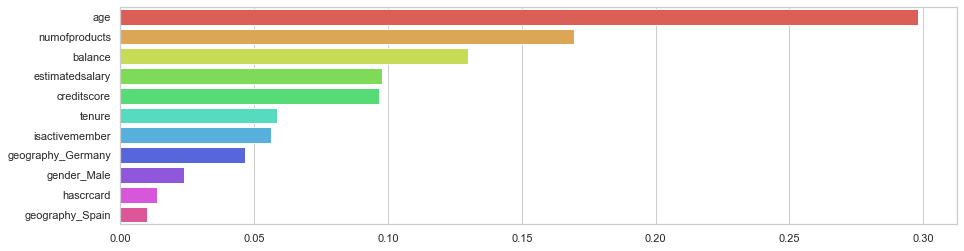

In [41]:

feat_importances = pd.DataFrame(model.feature_importances_, index=features_train.columns, columns=["Importance"]).sort_values(by='Importance',ascending=False)
sns.set_theme(style="whitegrid")
sns.barplot(data=feat_importances,x=feat_importances.values.T.reshape(11), y =feat_importances.index,palette='hls',saturation=1 )
plt.rcParams['figure.figsize']=(19,4)

<i>Как видим из Feature_impportances_, самый важным фактором оказались возраст, число продуктов банка, банас и примерная зарплата.</i>